In [1]:
import numpy as np
import matplotlib.pyplot as plt

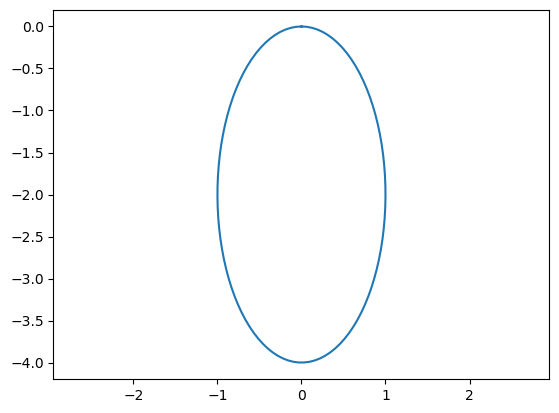

In [2]:
# this cell generates the set of points we'll be working on

theta = np.linspace(0, 2*np.pi, 100)
points = np.column_stack([np.sin(theta), np.cos(theta) * 2])
points -= points[0]


plt.plot(points[:,0], points[:,1])
plt.axis("equal");

In [3]:
# this cell calculates the angles between points and stores them in `angles`

angles = []

for i in range(1,points.shape[0]-1):
    # here we define unit vectors paralell to the i and (i+1)th line segments in `points`
    current_segment = points[i] - points[i-1]
    next_segment = points[i+1] - points[i]
    current_segment /= np.linalg.norm(current_segment)
    next_segment /= np.linalg.norm(next_segment)
    
    # calculate the angle using arccos
    angle_magnitude = np.arccos(current_segment @ next_segment)
    angle_sign = np.sign(np.linalg.det(np.column_stack([current_segment, next_segment])))
    angle_by_cos = angle_magnitude * angle_sign
    
    # calculate the angle using atan2
    orth_to_current_segment = np.array([[0,-1],[1,0]]) @ current_segment
    angle_by_atan2 = np.arctan2(next_segment @ orth_to_current_segment, next_segment @ current_segment)
    
    # check that both methods give the correct answer
    assert np.isclose(angle_by_cos, angle_by_atan2)
    
    angles.append(angle_by_cos)

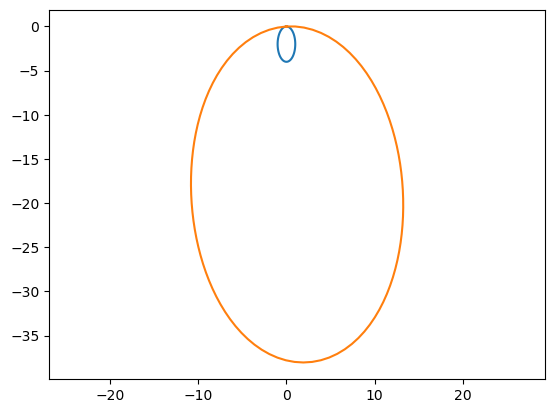

In [4]:
# this cell does the reconstruction

def reconstruct_points_from_angles(angles, angle_0=0):
    """converts a sequence of angles to a sequence of line segments joined by the given angles
    
    Parameters
    ----------
    angles : iterable of n floats
        the angles between adjacent line segments
    
    angle_0 : float
        the angle between the initial line segment and the x-axis; this will usually be arbitrary
    
    Returns
    -------
    reconstructed_points : array of floats
        The x and y coordinates of the sequence of reconstructed points; if n angles were given, this implies n+1 line segments, which 
        means n+2 points will be returned, where the first point is the origin.
    """
    reconstructed_points = [np.array([0,0]), np.array([np.cos(angle_0), np.sin(angle_0)])]

    for theta in angles:
        last_segment = reconstructed_points[-1] - reconstructed_points[-2]
        current_theta = np.arctan2(last_segment[1], last_segment[0])
        reconstructed_points.append(reconstructed_points[-1] + [np.cos(current_theta + theta), np.sin(current_theta + theta)])
    return np.array(reconstructed_points)

reconstructed_points = reconstruct_points_from_angles(angles)

plt.plot(points[:,0], points[:,1])
plt.plot(reconstructed_points[:,0], reconstructed_points[:,1])
plt.axis("equal");